In [1]:
import os

import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
sns.set()
sns.set_context("paper", font_scale=1.2)

In [3]:
df = pd.read_csv("matching_scores.csv")
# drop the first column
df = df.drop(df.columns[0], axis=1)
# set the index to the file_name
df = df.set_index('file_name')
df.index = df.index.map(lambda x: x[x.rfind('/') + 1:])

In [4]:
# get the list of files in folder that is .png
files = [file for file in os.listdir('.') if file.endswith('.png')]
files = sorted(files)
files_idx = list(range(len(files)))
# df_best replace file_name with index mapped
df['file_name'] = df.index.map(lambda x: files_idx[files.index(x)])
df['file_name_string'] = df.index
df.reset_index(inplace=True, drop=True)

In [5]:
df['unique_index'] = df.index

In [6]:
df_copy = df
df_best = df_copy.sort_values(by='max_val').groupby('file_name').last()
df_best['pitch_diff'] = df_best['pitch'].diff().abs()
df_best['pitch_diff'][0] = df_copy.iloc[-1]['pitch'] - df_copy.iloc[0]['pitch']
df_best['pitch_diff'] = df_best['pitch_diff'].apply(lambda x: x if x < 180 else 360 - x)

/var/folders/cr/fk05n77x7l59vt1zwmvrl4yc0000gn/T/ipykernel_37424/3878040909.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_best['pitch_diff'][0] = df_copy.iloc[-1]['pitch'] - df_copy.iloc[0]['pitch']


/Users/mikkel/repos/RRTNCTTASA/python-version/.venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/mikkel/repos/RRTNCTTASA/python-version/.venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/mikkel/repos/RRTNCTTASA/python-version/.venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/mikkel/repos/RRTNCTTASA/python-version/.venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: 

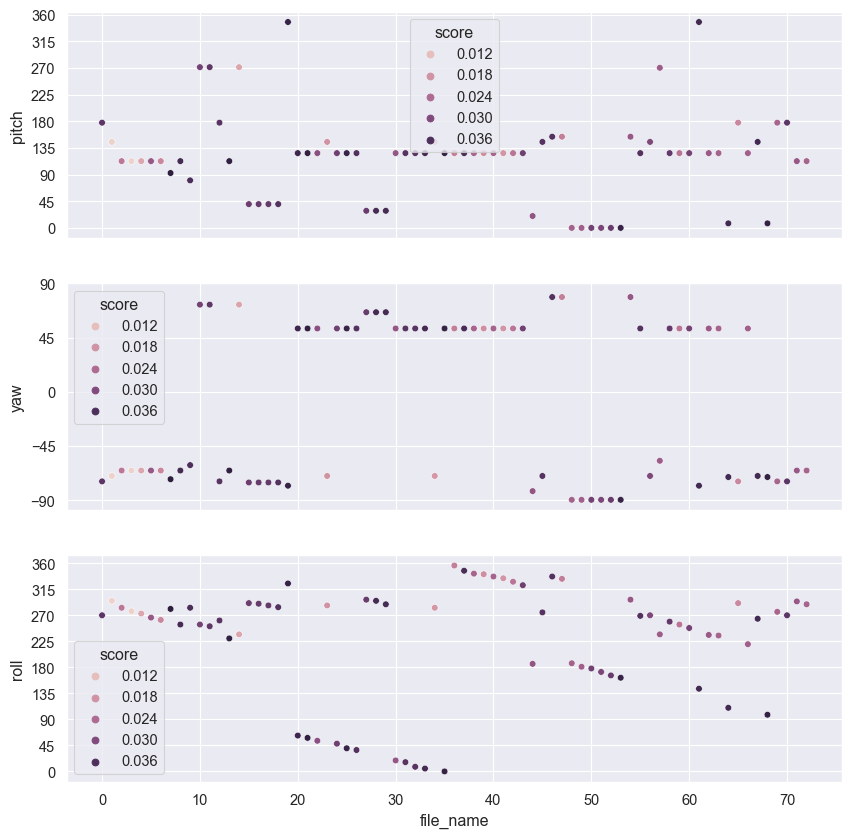

In [7]:
# plot roll, pitch, yaw in subplots with score as hue and file_name as x
fig, axes = plt.subplots(3, 1, figsize=(10, 10), sharex=True)
sns.scatterplot(ax=axes[0], data=df_best, x='file_name', y='pitch', hue='score');
axes[0].set_yticks(range(0, 361, 45));
sns.scatterplot(ax=axes[1], data=df_best, x='file_name', y='yaw', hue='score');
axes[1].set_yticks(range(-90, 91, 45));
sns.scatterplot(ax=axes[2], data=df_best, x='file_name', y='roll', hue='score');
axes[2].set_yticks(range(0, 361, 45));

In [8]:
df_copy.sort_values(by='max_val').groupby('file_name').last()

,rotation,max_val,rotation_reverse,max_val_reverse,translation,x,y,z,score,reversed_diff,...,channel,roll,pitch,yaw,channel_reverse,roll_reverse,pitch_reverse,yaw_reverse,file_name_string,unique_index
file_name,,,,,,,,,,,,,,,,,,,,,
0,"pitch/theta/X: 177.63, yaw/phi/Y: -74.25, roll...",141.235233,"pitch/theta/X: 177.63, yaw/phi/Y: -74.25, roll...",140.604177,"x: 0.67, y: -0.15, z: 21.27",0.667574,-0.150039,21.267107,0.034288,-0.631055,...,rb,270,177.632,-74.25,rb,270,177.632,-74.25,0.png,8
1,"pitch/theta/X: 145.17, yaw/phi/Y: -69.75, roll...",134.971181,"pitch/theta/X: 145.17, yaw/phi/Y: -69.75, roll...",134.617342,"x: 0.65, y: -0.20, z: 21.27",0.649262,-0.202988,21.266372,0.009473,-0.353840,...,rb,295,145.171,-69.75,rb,295,145.171,-69.75,1.png,11
2,"pitch/theta/X: 112.71, yaw/phi/Y: -65.25, roll...",150.067300,"pitch/theta/X: 112.71, yaw/phi/Y: -65.25, roll...",149.171869,"x: 0.33, y: -0.59, z: 20.78",0.330676,-0.586528,20.784142,0.022168,-0.895431,...,rb,283,112.710,-65.25,rb,283,112.710,-65.25,10.png,24
3,"pitch/theta/X: 112.71, yaw/phi/Y: -65.25, roll...",142.341961,"pitch/theta/X: 112.71, yaw/phi/Y: -65.25, roll...",141.931490,"x: 0.29, y: -0.62, z: 20.75",0.285587,-0.620155,20.754849,0.009495,-0.410471,...,rb,277,112.710,-65.25,rb,277,112.710,-65.25,11.png,34
4,"pitch/theta/X: 112.71, yaw/phi/Y: -65.25, roll...",148.753822,"pitch/theta/X: 112.71, yaw/phi/Y: -65.25, roll...",148.076363,"x: 0.22, y: -0.65, z: 20.88",0.215493,-0.649924,20.881086,0.015222,-0.677459,...,rb,273,112.710,-65.25,rb,273,112.710,-65.25,12.png,46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,"pitch/theta/X: 7.66, yaw/phi/Y: -70.65, roll/Z...",142.773694,"pitch/theta/X: 7.66, yaw/phi/Y: -70.65, roll/Z...",141.660091,"x: 0.67, y: -0.04, z: 21.12",0.671955,-0.043819,21.117379,0.039031,-1.113603,...,rb,98,7.663,-70.65,rb,98,7.663,-70.65,70.png,1727
69,"pitch/theta/X: 177.63, yaw/phi/Y: -74.25, roll...",140.537848,"pitch/theta/X: 177.63, yaw/phi/Y: -74.25, roll...",139.691921,"x: 0.67, y: -0.09, z: 21.19",0.665193,-0.087944,21.191253,0.025011,-0.845927,...,rb,276,177.632,-74.25,rb,276,177.632,-74.25,71.png,1735
70,"pitch/theta/X: 177.63, yaw/phi/Y: -74.25, roll...",141.235233,"pitch/theta/X: 177.63, yaw/phi/Y: -74.25, roll...",140.604177,"x: 0.67, y: -0.15, z: 21.27",0.667574,-0.150039,21.267107,0.034288,-0.631055,...,rb,270,177.632,-74.25,rb,270,177.632,-74.25,72.png,1748


In [9]:
# while True:
#     df_best = df_copy.sort_values(by='max_val').groupby('file_name').last()
#     df_best['pitch_diff'] = df_best['pitch'].diff().abs()
#     df_best.iloc[0]['pitch_diff'] = df_copy.iloc[-1]['pitch'] - df_copy.iloc[0]['pitch']
#     df_best['pitch_diff'] = df_best['pitch_diff'].apply(lambda x: x if x < 180 else 360 - x)
#
#     if df_best['pitch_diff'].max() < 40:
#         break
#     else:
#         # find the first index which has pitch_diff > 40
#         # idx = df_best[df_best['pitch_diff'] > 40].index[0]
#         idx = df_best['pitch_diff'].idxmax()
#         unique = df_best.loc[idx]['unique_index']
#         df_copy = df_copy.drop(unique)

In [10]:
len(df_best.index.unique())

73

In [11]:
# only keep 'file_name', 'score', 'pitch', 'yaw', 'roll' columns
df_small = df_best[['file_name_string', 'score', 'pitch', 'yaw', 'roll', 'x', 'y', 'z', 'channel', 'max_val']]

/Users/mikkel/repos/RRTNCTTASA/python-version/.venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/mikkel/repos/RRTNCTTASA/python-version/.venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/mikkel/repos/RRTNCTTASA/python-version/.venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/mikkel/repos/RRTNCTTASA/python-version/.venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: 

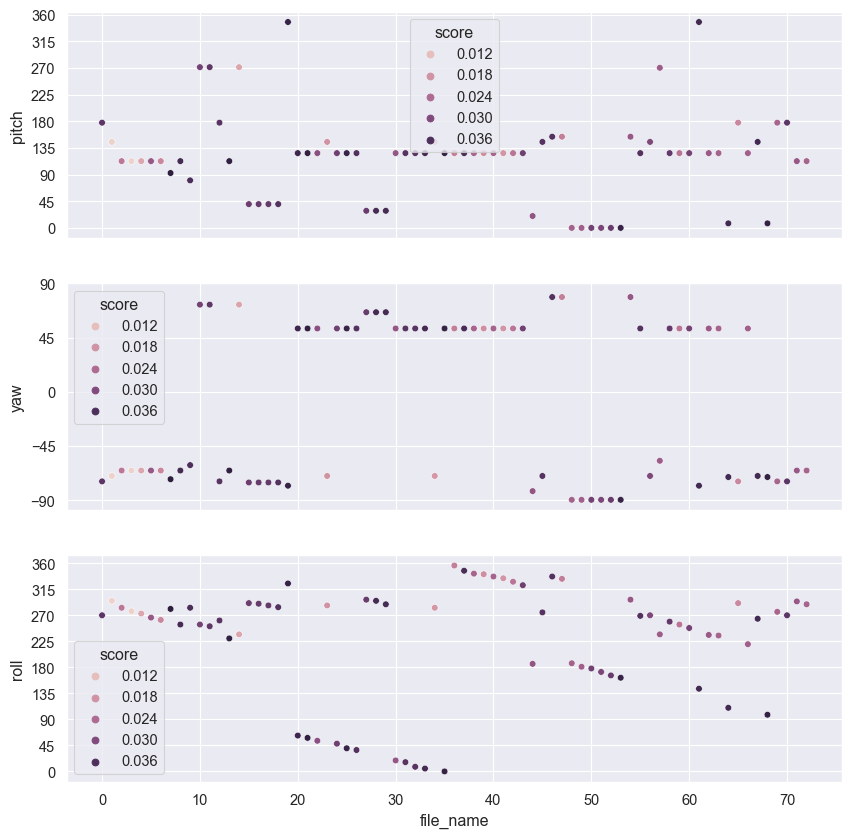

In [12]:
# plot roll, pitch, yaw in subplots with score as hue and file_name as x
fig, axes = plt.subplots(3, 1, figsize=(10, 10), sharex=True)
sns.scatterplot(ax=axes[0], data=df_best, x='file_name', y='pitch', hue='score');
axes[0].set_yticks(range(0, 361, 45));
sns.scatterplot(ax=axes[1], data=df_best, x='file_name', y='yaw', hue='score');
axes[1].set_yticks(range(-90, 91, 45));
sns.scatterplot(ax=axes[2], data=df_best, x='file_name', y='roll', hue='score');
axes[2].set_yticks(range(0, 361, 45));

In [13]:
df_small['roll'].diff().describe()

count     72.000000
mean       0.263889
std      107.648881
min     -283.000000
25%       -8.000000
50%       -4.000000
75%       12.250000
max      356.000000
Name: roll, dtype: float64

/Users/mikkel/repos/RRTNCTTASA/python-version/.venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/mikkel/repos/RRTNCTTASA/python-version/.venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


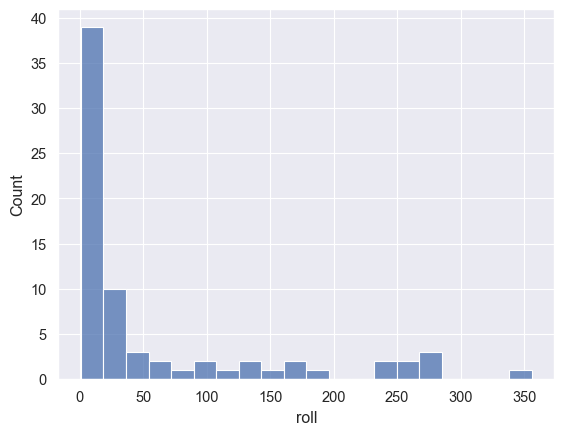

In [14]:
# find delta values for roll
# plot as histogram absoulte values
sns.histplot(df_small['roll'].diff().abs(), bins=20);

In [15]:
df_small.drop(['channel', 'max_val'], axis=1).to_csv("best_scores.csv")